# ÖZGE SAYAR

# ENGR421 HOMEWORK 1

In [229]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


## Parameters

In [230]:
np.random.seed(421)

#mean parameters
class_means = np.array ([[+0.0, +4.5],
                        [-4.5,-1.0],
                        [+4.5,-1.0],
                        [+0.0,-4.0]])
#covarience parameters
class_covariances= np.array([[[+3.2, +0.0], 
                             [+0.0, +1.2]],
                            [[+1.2, +0.8], 
                             [+0.8, +1.2]],
                            [[+1.2, -0.8], 
                             [-0.8, +1.2]],
                            [[+1.2, +0.0], 
                             [+0.0, +3.2]]])
class_sizes= np.array([105, 145, 135, 115])

## Data Generation

In [231]:
#generate random samples
points1= np.random.multivariate_normal(mean = class_means[0,:],
                          cov = class_covariances[0,:,:],
                          size = class_sizes[0])
points2= np.random.multivariate_normal(mean = class_means[1,:],
                          cov = class_covariances[1,:,:],
                          size = class_sizes[1])
points3= np.random.multivariate_normal(mean = class_means[2,:],
                          cov = class_covariances[2,:,:],
                          size = class_sizes[2])
points4= np.random.multivariate_normal(mean = class_means[3,:],
                          cov = class_covariances[3,:,:],
                          size = class_sizes[3])
x = np.vstack((points1, points2, points3, points4))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2]), np.repeat(4, class_sizes[3])))


## Exporting Data

In [232]:
# write data to a file
np.savetxt("hw1.csv", np.hstack((x, y[:, None])), fmt = "%f,%f,%d")

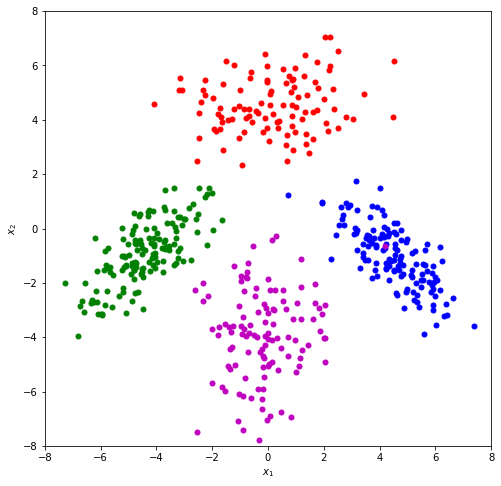

In [233]:
#plotting data

x1_interval = np.linspace(-8, +8, 1001)
x2_interval = np.linspace(-8, +8, 1001)

x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
X_grid = np.vstack((x1_grid.flatten(), x2_grid.flatten())).T

D1 = stats.multivariate_normal.pdf(X_grid, mean = class_means[0,:],
                                   cov = class_covariances[0,:,:])
D1 = D1.reshape((len(x1_interval), len(x2_interval)))

D2 = stats.multivariate_normal.pdf(X_grid, mean = class_means[1,:],
                                   cov = class_covariances[1,:,:])
D2 = D2.reshape((len(x1_interval), len(x2_interval)))

D3 = stats.multivariate_normal.pdf(X_grid, mean = class_means[2,:],
                                   cov = class_covariances[2,:,:])
D3 = D3.reshape((len(x1_interval), len(x2_interval)))

D4 = stats.multivariate_normal.pdf(X_grid, mean = class_means[3,:],
                                   cov = class_covariances[3,:,:])
D4 = D4.reshape((len(x1_interval), len(x2_interval)))

# plot data points generated
plt.figure(figsize = (8, 8))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10)
plt.plot(points4[:,0], points4[:,1], "m.", markersize = 10)

#plt.contour(x1_grid, x2_grid, D1, levels = [0.03, 0.06, 0.09, 0.12],
#            colors = "a", linestyles = "dashed")
#plt.contour(x1_grid, x2_grid, D2, levels = [0.03, 0.06, 0.09, 0.12],
#            colors = "b", linestyles = "dashed")

plt.xlim((-8, +8))
plt.ylim((-8, +8))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [234]:
#import data

# read data into memory
data_set = np.genfromtxt("hw1.csv", delimiter = ",")

# get x and y values
X = data_set[:,[0, 1]]
y_truth = data_set[:,2].astype(int)

# get number of classes and number of samples
K = np.max(y_truth)
N = data_set.shape[0]


## Parameter Estimation

In [235]:
# sample means
sample_means = [np.mean(x[y==(c+1)], axis=0) for c in range(K)]

# sample covariences
sample_covariances = [np.matmul(np.transpose(X[y == (c+1)] - sample_means[c]),X[y == (c+1)] - sample_means[c])/class_sizes[c] for c in range(K)]
# prior probabilities
class_priors = [np.mean(y == (c + 1)) for c in range(K)]

print(sample_means)
print(sample_covariances)
print(class_priors)

[array([0.14550241, 4.55638816]), array([-4.45510875, -0.92632895]), array([ 4.48187484, -1.02664884]), array([-0.15761939, -3.93467956])]
[array([[2.88774467, 0.26160804],
       [0.26160804, 1.02301075]]), array([[1.43606841, 1.01209997],
       [1.01209997, 1.36898642]]), array([[ 1.2777115 , -0.95351749],
       [-0.95351749,  1.29984191]]), array([[1.32615908, 0.27672137],
       [0.27672137, 2.80556549]])]
[0.21, 0.29, 0.27, 0.23]


## Confusion Matrix 

In [236]:
#parameter classification
A = 2
W = np.array([-0.5 * np.linalg.inv(sample_covariances[c]) for c in range (K)])
w = np.array([np.matmul(np.linalg.inv(sample_covariances[c]),sample_means[c]) for c in range (K)])
w0 = np.array([ -0.5 * np.matmul(np.matmul(sample_means[c].T, np.linalg.inv(sample_covariances[c])), sample_means[c]) - A/2 * np.log(2 * math.pi) - 0.5 * np.log(np.linalg.det(sample_covariances[c])) + np.log(class_priors[c]) for c in range (K)])                                           

def score(j, k):
    return np.matmul(np.matmul(X[k].T, W[j]), X[k]) + np.matmul(w[j].T, X[k]) + w0[j]
    y_predicted = score.append
    for h in range(len(X)):
        maximum = np.argmax(y_predicted)
    
#calculate confusion matrix
confusion_matrix = pd.crosstab(y_predicted, y_truth, 
                               rownames = ["y_predicted"], 
                               colnames = ["y_truth"])

print(confusion_matrix)

y_truth        1    2    3    4
y_predicted                    
0.0          105    0    0    0
1.0            0  145    0    0
2.0            0    0  133    1
3.0            0    0    2  114


##  Decision Boundaries

In [239]:
x1_interval = np.linspace(-8, +8, 1201)
x2_interval = np.linspace(-8, +8, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)

discriminant_values = [][]
for m in range (len(X)):
    for n in range K
        discriminant_values = W[n,m] * x1_grid + w[n,m] * x2_grid + w0[n,m]

plt.figure(figsize = (8, 8))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "b.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 4, 0], X[y_truth == 4, 1], "m.", markersize = 10)
      

plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values, levels = 0, colors = "k")

plt.xlim((-8, +8))
plt.ylim((-8, +8))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

SyntaxError: invalid syntax (<ipython-input-239-cd584b23158a>, line 5)